## Percepton Demo

Acknowledgements: Parts of this demo are from https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', -1, 1)
    data = np.asmatrix(data, dtype = 'float64')
    print(data)
    return data
data = load_data()

[[ 5.1  3.5  1.4  0.2 -1. ]
 [ 4.9  3.   1.4  0.2 -1. ]
 [ 4.7  3.2  1.3  0.2 -1. ]
 [ 4.6  3.1  1.5  0.2 -1. ]
 [ 5.   3.6  1.4  0.2 -1. ]
 [ 5.4  3.9  1.7  0.4 -1. ]
 [ 4.6  3.4  1.4  0.3 -1. ]
 [ 5.   3.4  1.5  0.2 -1. ]
 [ 4.4  2.9  1.4  0.2 -1. ]
 [ 4.9  3.1  1.5  0.1 -1. ]
 [ 5.4  3.7  1.5  0.2 -1. ]
 [ 4.8  3.4  1.6  0.2 -1. ]
 [ 4.8  3.   1.4  0.1 -1. ]
 [ 4.3  3.   1.1  0.1 -1. ]
 [ 5.8  4.   1.2  0.2 -1. ]
 [ 5.7  4.4  1.5  0.4 -1. ]
 [ 5.4  3.9  1.3  0.4 -1. ]
 [ 5.1  3.5  1.4  0.3 -1. ]
 [ 5.7  3.8  1.7  0.3 -1. ]
 [ 5.1  3.8  1.5  0.3 -1. ]
 [ 5.4  3.4  1.7  0.2 -1. ]
 [ 5.1  3.7  1.5  0.4 -1. ]
 [ 4.6  3.6  1.   0.2 -1. ]
 [ 5.1  3.3  1.7  0.5 -1. ]
 [ 4.8  3.4  1.9  0.2 -1. ]
 [ 5.   3.   1.6  0.2 -1. ]
 [ 5.   3.4  1.6  0.4 -1. ]
 [ 5.2  3.5  1.5  0.2 -1. ]
 [ 5.2  3.4  1.4  0.2 -1. ]
 [ 4.7  3.2  1.6  0.2 -1. ]
 [ 4.8  3.1  1.6  0.2 -1. ]
 [ 5.4  3.4  1.5  0.4 -1. ]
 [ 5.2  4.1  1.5  0.1 -1. ]
 [ 5.5  4.2  1.4  0.2 -1. ]
 [ 4.9  3.1  1.5  0.1 -1. ]
 [ 5.   3.2  1.2  0.

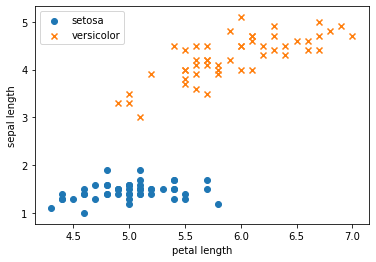

In [119]:
# Let us visualize the dataset now by plotting two features
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [59]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.ones(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
    ploss_ = []
    for epoch in range(num_iter):
        misclassified = 0
        ploss = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            #print(y, label.item(0,0))
            target = 1.0 if (y > 0) else -1.0
            
            delta = (label.item(0,0) - target)
            ploss += max(0, -label.item(0,0)*y)
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        misclassified_.append(misclassified)
        ploss_.append(ploss)
    return (w, misclassified_, ploss_)
             
num_iter = 10
w, misclassified_, ploss_ = perceptron(data, num_iter)
print(ploss_)

[matrix([[539.96]]), matrix([[176.18]]), matrix([[50.94]]), matrix([[134.8]]), matrix([[17.]]), matrix([[42.1]]), 0, 0, 0, 0]


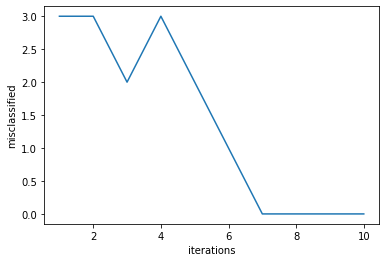

In [60]:
# Plot Misclassifications
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

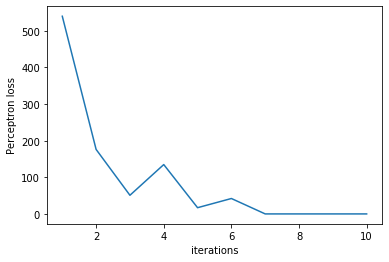

In [61]:
# Plot Perceptron Loss
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, ploss_)
plt.xlabel('iterations')
plt.ylabel('Perceptron loss')
plt.show()

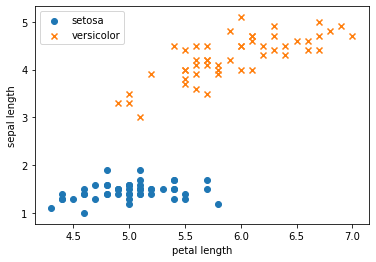

In [70]:
data2 = data[:100,[0,2,4]]
w = -10*np.ones(shape=(1, 3))
plt.scatter(np.array(data2[:50,0]), np.array(data2[:50,1]), marker='o', label='setosa')
plt.scatter(np.array(data2[50:,0]), np.array(data2[50:,1]), marker='x', label='versicolor')
x1 = np.linspace(3,8,50)
x2 = -w[0,0]/w[0,1]*x1 - w[0,2]/w[0,1]
#plt.plot(x1,x2)
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

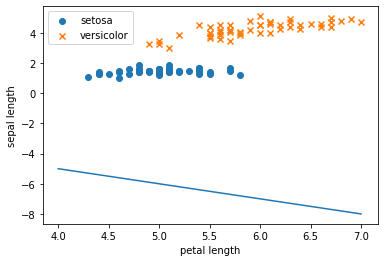

[2, 2, 3, 1, 0, 0, 0, 0, 0, 0]
[matrix([[81.36]]), matrix([[52.36]]), matrix([[114.24]]), matrix([[37.46]]), 0, 0, 0, 0, 0, 0]
[[-3.  -7.6 15.2]]


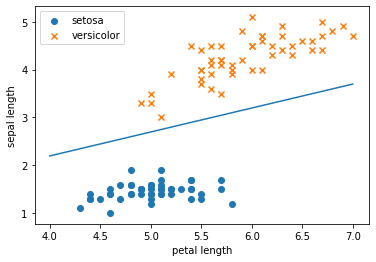

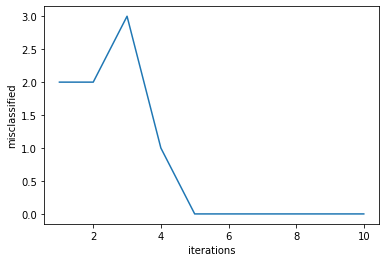

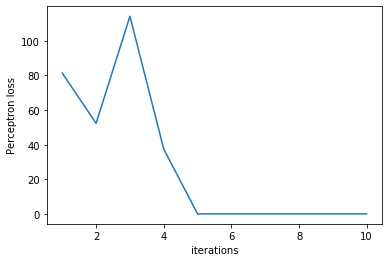

In [117]:
# Let us now run perceptron and plot the decision boundaries 
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    # set weights to zero
    w = np.ones(shape=(1, features.shape[1]+1))
    misclassified_ = [] 
    ploss_ = []
    x1 = np.linspace(4,7,50)
    x2 = -w[0,1]*x1/w[0,2] - w[0,0]/w[0,2]
    plt.scatter(np.array(data2[:50,0]), np.array(data2[:50,1]), marker='o', label='setosa')
    plt.scatter(np.array(data2[50:,0]), np.array(data2[50:,1]), marker='x', label='versicolor')
    plt.plot(x1,x2)
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend()
    plt.show()
    for epoch in range(num_iter):
        misclassified = 0
        targetvec = []
        labelvec = []
        yvec = []
        ploss = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else -1.0      
            delta = (label.item(0,0) - target)
            ploss += max(0, -label.item(0,0)*y)
            if(label.item(0,0) != target): # misclassified
                misclassified += 1
                w += (delta * x)
        misclassified_.append(misclassified)
        ploss_.append(ploss)
    return (w, misclassified_, ploss_)
             
num_iter = 10
w, misclassified_, ploss_ = perceptron(data2, num_iter)
print(misclassified_)
print(ploss_)
print(w)
x1 = np.linspace(4,7,50)
x2 = -w[0,1]*x1/w[0,2] - w[0,0]/w[0,2]
plt.scatter(np.array(data2[:50,0]), np.array(data2[:50,1]), marker='o', label='setosa')
plt.scatter(np.array(data2[50:,0]), np.array(data2[50:,1]), marker='x', label='versicolor')
plt.plot(x1,x2)
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

# Plot Misclassifications
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

# Plot Perceptron Loss
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, ploss_)
plt.xlabel('iterations')
plt.ylabel('Perceptron loss')
plt.show()